In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
meta = pd.read_csv("data_files/train.csv", sep = ',')
meta.head()

,id,movie,dialogue,genres
0,0,0,I thought you were in a meeting--? <BR> I am. With you.,"[u'drama', u'romance']"
1,1,1,Are you sure you're okay? You're pale. <BR> I feel like shit. Me and my frigging nosebleeds. <BR> I'm taking you to the doctor when we get home and I don't want to hear any arguments. <BR> Would you be bummed out if I didn't go to Chicago with you? <BR> No not at all. Sure. You're right. You...,[u'drama']
2,2,2,Go on! Get out! <BR> Mom look don't say anything. First of all I'm not pregnant.,[u'comedy']
3,3,3,I could have lost my fucking hands. <BR> That would have kept you out of the Magic Circle. Which was presumably the idea. These are about Nix.,"[u'mystery', u'thriller']"
4,4,4,Stick with me on this Gloria. I need you... <BR> And if the teeth aren't Suzie's? You'll give this up? <BR> If I'm wrong about those teeth -- it's a promise.,"[u'crime', u'thriller']"


In [4]:
movies = meta[['movie', 'dialogue', 'genres']]
movies.head()
def remove_chars(input_string, list_of_chars=["[", "]", "'"]):
    for c in list_of_chars:
        input_string = input_string.replace(c, "")
    return input_string

def make_list(row):
    tmp_list = remove_chars(row['genres']).split(", ")
    res_list = [x[1:] for x in tmp_list]
    return(res_list)
    
movies['genres_list'] = movies.apply(make_list, axis=1)
movies.head()

,movie,dialogue,genres,genres_list
0,0,I thought you were in a meeting--? <BR> I am. With you.,"[u'drama', u'romance']","[drama, romance]"
1,1,Are you sure you're okay? You're pale. <BR> I feel like shit. Me and my frigging nosebleeds. <BR> I'm taking you to the doctor when we get home and I don't want to hear any arguments. <BR> Would you be bummed out if I didn't go to Chicago with you? <BR> No not at all. Sure. You're right. You...,[u'drama'],[drama]
2,2,Go on! Get out! <BR> Mom look don't say anything. First of all I'm not pregnant.,[u'comedy'],[comedy]
3,3,I could have lost my fucking hands. <BR> That would have kept you out of the Magic Circle. Which was presumably the idea. These are about Nix.,"[u'mystery', u'thriller']","[mystery, thriller]"
4,4,Stick with me on this Gloria. I need you... <BR> And if the teeth aren't Suzie's? You'll give this up? <BR> If I'm wrong about those teeth -- it's a promise.,"[u'crime', u'thriller']","[crime, thriller]"


In [5]:
all_genres = sum(movies['genres_list'],[])
len(set(all_genres))

20

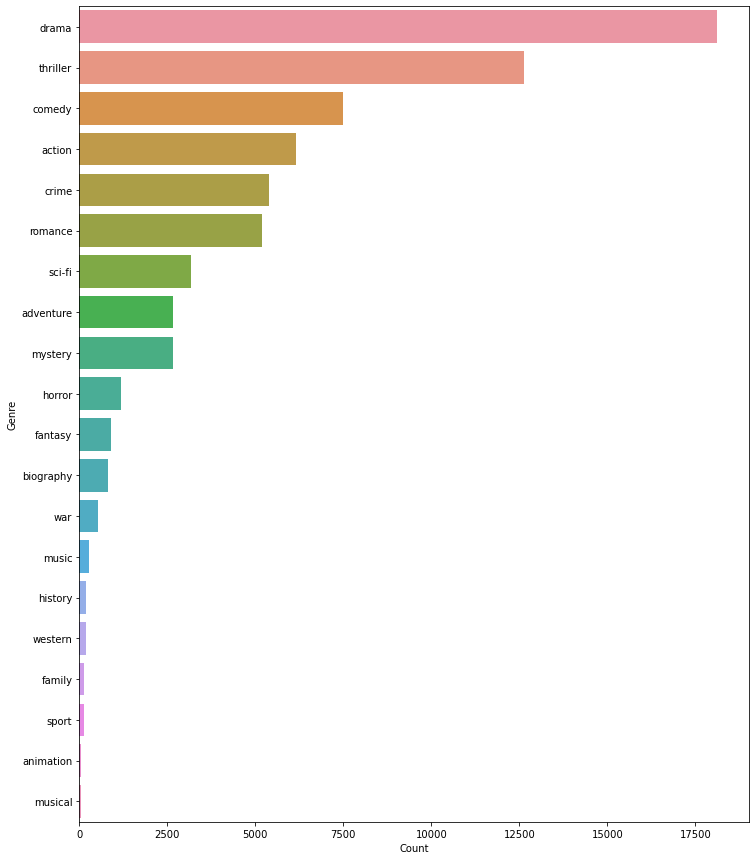

In [6]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
plt.show()

In [7]:
def remove_BR(row):
    tmp_list = remove_chars(row['dialogue'], ["<BR>"])
    return(tmp_list)

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

movies['dialogue2'] = movies.apply(remove_BR, axis=1)
movies['clean_dialogue'] = movies['dialogue2'].apply(lambda x: clean_text(x))
movies.head()

,movie,dialogue,genres,genres_list,dialogue2,clean_dialogue
0,0,I thought you were in a meeting--? <BR> I am. With you.,"[u'drama', u'romance']","[drama, romance]",I thought you were in a meeting--? I am. With you.,i thought you were in a meeting i am with you
1,1,Are you sure you're okay? You're pale. <BR> I feel like shit. Me and my frigging nosebleeds. <BR> I'm taking you to the doctor when we get home and I don't want to hear any arguments. <BR> Would you be bummed out if I didn't go to Chicago with you? <BR> No not at all. Sure. You're right. You...,[u'drama'],[drama],Are you sure you're okay? You're pale. I feel like shit. Me and my frigging nosebleeds. I'm taking you to the doctor when we get home and I don't want to hear any arguments. Would you be bummed out if I didn't go to Chicago with you? No not at all. Sure. You're right. You fly home and ge...,are you sure youre okay youre pale i feel like shit me and my frigging nosebleeds im taking you to the doctor when we get home and i dont want to hear any arguments would you be bummed out if i didnt go to chicago with you no not at all sure youre right you fly home and get some rest nice first ...
2,2,Go on! Get out! <BR> Mom look don't say anything. First of all I'm not pregnant.,[u'comedy'],[comedy],Go on! Get out! Mom look don't say anything. First of all I'm not pregnant.,go on get out mom look dont say anything first of all im not pregnant
3,3,I could have lost my fucking hands. <BR> That would have kept you out of the Magic Circle. Which was presumably the idea. These are about Nix.,"[u'mystery', u'thriller']","[mystery, thriller]",I could have lost my fucking hands. That would have kept you out of the Magic Circle. Which was presumably the idea. These are about Nix.,i could have lost my fucking hands that would have kept you out of the magic circle which was presumably the idea these are about nix
4,4,Stick with me on this Gloria. I need you... <BR> And if the teeth aren't Suzie's? You'll give this up? <BR> If I'm wrong about those teeth -- it's a promise.,"[u'crime', u'thriller']","[crime, thriller]",Stick with me on this Gloria. I need you... And if the teeth aren't Suzie's? You'll give this up? If I'm wrong about those teeth -- it's a promise.,stick with me on this gloria i need you and if the teeth arent suzies youll give this up if im wrong about those teeth its a promise


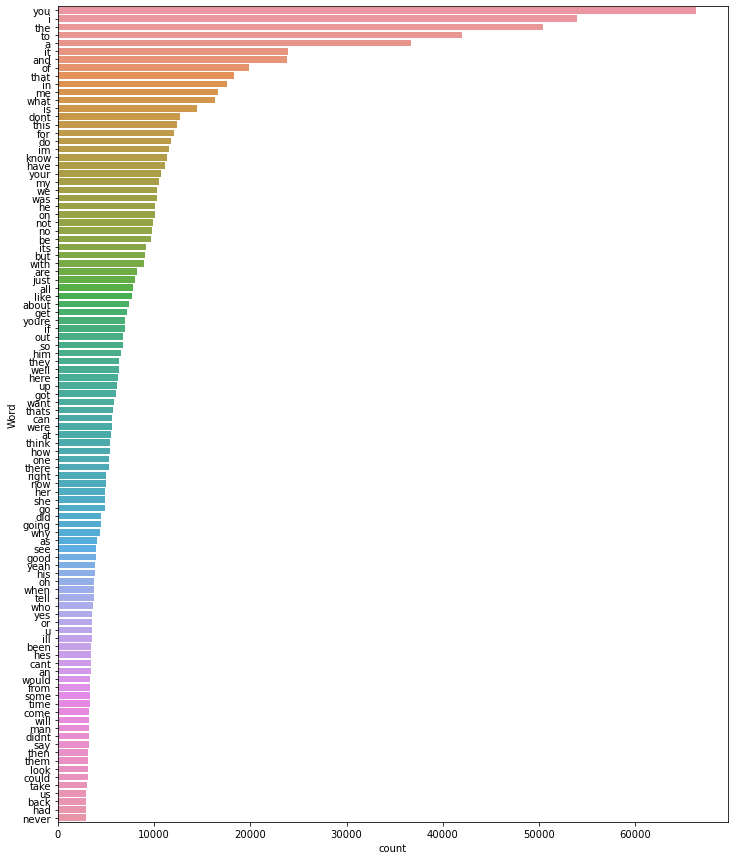

In [8]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 

    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 

    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

# print 100 most frequent words 
freq_words(movies['clean_dialogue'], 100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ogadzhily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


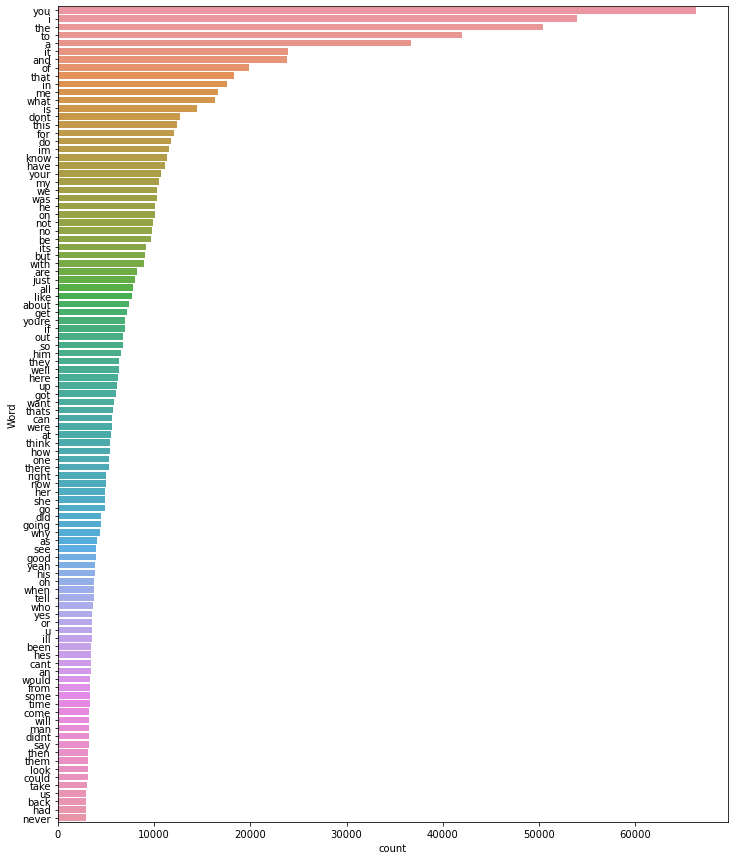

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

#movies['clean_dialogue'] = movies['clean_dialogue'].apply(lambda x: remove_stopwords(x))
freq_words(movies['clean_dialogue'], 100)

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies['genres_list'])

# transform target variable
y = multilabel_binarizer.transform(movies['genres_list'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies['clean_dialogue'], y, test_size=0.2, random_state=9)

# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [11]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=1000)
clf = OneVsRestClassifier(lr)

# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

y_pred[3]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [12]:
multilabel_binarizer.inverse_transform(y_pred)[3]
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.5729517396184064

In [13]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
for i in range(101):
    t = i / 100
    y_pred_new = (y_pred_prob >= t).astype(int)

    # evaluate performance
    f1 = f1_score(yval, y_pred_new, average="micro")
    #print(i, t, f1)

t = 0.28 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
f1 = f1_score(yval, y_pred_new, average="micro")
print(f1)
predicted_labels = multilabel_binarizer.inverse_transform(y_pred_new)
print(predicted_labels[:5])

0.6528663530231748
[('comedy', 'thriller'), ('comedy', 'drama'), ('drama',), ('drama', 'mystery'), ('crime', 'drama')]


TEST SAMPLE

In [14]:
test_data = pd.read_csv("data_files/test.csv", sep = ',')
test_data.head()

,id,dialogue
0,0,Boy! Did you see the way Mama whopped that deputy with her shoe? Knocked the gun right out ... <BR> I don't want you hanging around there hear?
1,1,"Gordon, the insurance people are balking on the logging trucks... <BR> Tell those spineless toads we'll self-insure if they don't write it... You fire 33 vice presidents and nothing changes... You eating twinkies today, Bud, or are you schtupping some stewardess..."
2,2,Very fancy. Did you design the bottle? <BR> Who else? I'm the one who runs the estates while you're here risking everything we have for the glory of Rome! Or for the glory of you! <BR> I'm a soldier -- we're at war. I can't stay home tending the damned olive groves? <BR> We don't need your h...
3,3,It makes me so mad. Steven Schwimmer ready to strike. The exterminating angel. <BR> It's all worked out. They'll lose tonight. Then they'll lose tomorrow. I see it with stunning clarity. <BR> It's your best play Nicky. <BR> They'll lose because they're my team. <BR> He will absolutely hate it.
4,4,Something ought to loosen him up ... how comes we're going to El Paso Rudy? <BR> I Just want to find a suitcase.


In [15]:
test_data['dialogue2'] = test_data.apply(remove_BR, axis=1)
test_data['clean_dialogue'] = test_data['dialogue2'].apply(lambda x: clean_text(x))
test_data.head(10)

,id,dialogue,dialogue2,clean_dialogue
0,0,Boy! Did you see the way Mama whopped that deputy with her shoe? Knocked the gun right out ... <BR> I don't want you hanging around there hear?,Boy! Did you see the way Mama whopped that deputy with her shoe? Knocked the gun right out ... I don't want you hanging around there hear?,boy did you see the way mama whopped that deputy with her shoe knocked the gun right out i dont want you hanging around there hear
1,1,"Gordon, the insurance people are balking on the logging trucks... <BR> Tell those spineless toads we'll self-insure if they don't write it... You fire 33 vice presidents and nothing changes... You eating twinkies today, Bud, or are you schtupping some stewardess...","Gordon, the insurance people are balking on the logging trucks... Tell those spineless toads we'll self-insure if they don't write it... You fire 33 vice presidents and nothing changes... You eating twinkies today, Bud, or are you schtupping some stewardess...",gordon the insurance people are balking on the logging trucks tell those spineless toads well self insure if they dont write it you fire vice presidents and nothing changes you eating twinkies today bud or are you schtupping some stewardess
2,2,Very fancy. Did you design the bottle? <BR> Who else? I'm the one who runs the estates while you're here risking everything we have for the glory of Rome! Or for the glory of you! <BR> I'm a soldier -- we're at war. I can't stay home tending the damned olive groves? <BR> We don't need your h...,Very fancy. Did you design the bottle? Who else? I'm the one who runs the estates while you're here risking everything we have for the glory of Rome! Or for the glory of you! I'm a soldier -- we're at war. I can't stay home tending the damned olive groves? We don't need your help we're do...,very fancy did you design the bottle who else im the one who runs the estates while youre here risking everything we have for the glory of rome or for the glory of you im a soldier were at war i cant stay home tending the damned olive groves we dont need your help were doing great on our own
3,3,It makes me so mad. Steven Schwimmer ready to strike. The exterminating angel. <BR> It's all worked out. They'll lose tonight. Then they'll lose tomorrow. I see it with stunning clarity. <BR> It's your best play Nicky. <BR> They'll lose because they're my team. <BR> He will absolutely hate it.,It makes me so mad. Steven Schwimmer ready to strike. The exterminating angel. It's all worked out. They'll lose tonight. Then they'll lose tomorrow. I see it with stunning clarity. It's your best play Nicky. They'll lose because they're my team. He will absolutely hate it.,it makes me so mad steven schwimmer ready to strike the exterminating angel its all worked out theyll lose tonight then theyll lose tomorrow i see it with stunning clarity its your best play nicky theyll lose because theyre my team he will absolutely hate it
4,4,Something ought to loosen him up ... how comes we're going to El Paso Rudy? <BR> I Just want to find a suitcase.,Something ought to loosen him up ... how comes we're going to El Paso Rudy? I Just want to find a suitcase.,something ought to loosen him up how comes were going to el paso rudy i just want to find a suitcase
5,5,I'll tell Mike I'm sick. There's a game tonight anyway and he'll never miss me. Afterwards he can go out with the guys. Just so the record is kept straight though I love Mike. What do want me to do? <BR> First of all we'll have a nice dinner. Try to find out where Dorothy sings. <BR> <BR> Great...,I'll tell Mike I'm sick. There's a game tonight anyway and he'll never miss me. Afterwards he can go out with the guys. Just so the record is kept straight though I love Mike. What do want me to do? First of all we'll have a nice dinner. Try to find out where Dorothy sings. Great. I'll pick ...,ill tell mike im sick theres a game tonight anyway and hell never miss me afterwards he can go out with the guys just so the

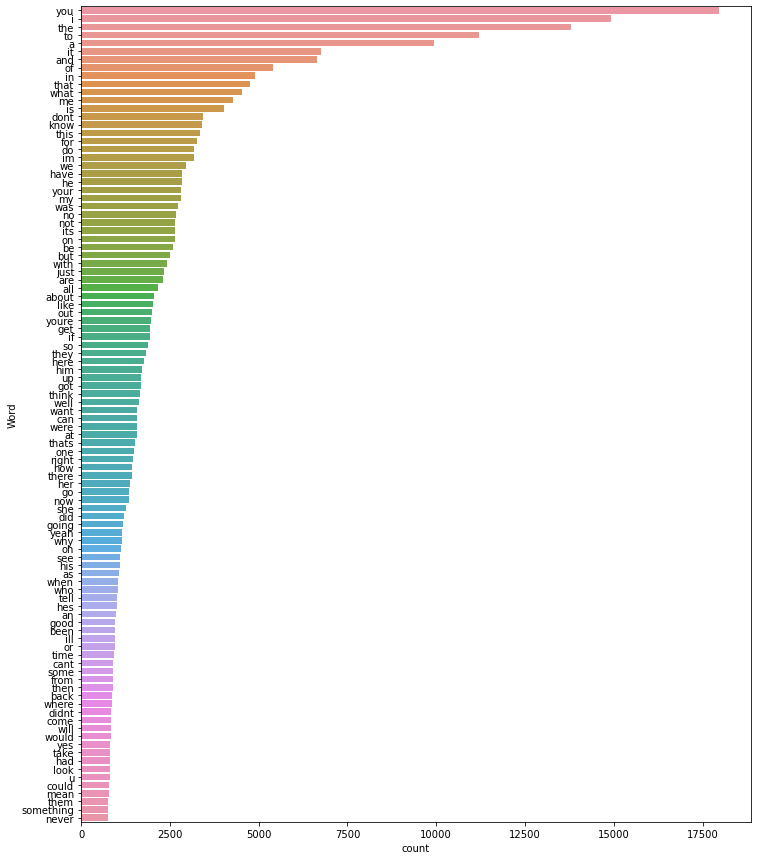

In [16]:
#test_data['clean_dialogue'] = test_data['clean_dialogue'].apply(lambda x: remove_stopwords(x))
freq_words(test_data['clean_dialogue'], 100)

In [17]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies['genres_list'])

# transform target variable
y = multilabel_binarizer.transform(movies['genres_list'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies['clean_dialogue'], y, test_size=0.2, random_state=9)
#xtrain = movies['clean_dialogue']
#ytrain = y
xtest = test_data['clean_dialogue']

# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [18]:
# Binary Relevance
lr = LogisticRegression(max_iter=1000)
clf = OneVsRestClassifier(lr)

# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
y_test_pred = clf.predict(xtest_tfidf)

y_test_pred[3]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# predict probabilities
y_test_pred_prob = clf.predict_proba(xtest_tfidf)
t = 0.28 # threshold value
y_test_pred_new = (y_test_pred_prob >= t).astype(int)

test_predicted_labels = multilabel_binarizer.inverse_transform(y_test_pred_new)
print(test_predicted_labels[:5])

[('crime', 'drama', 'thriller'), ('drama',), ('drama',), ('drama',), ('action', 'thriller')]


In [20]:
outfile = open("test_preds_07_alltrain_w_stopwords.csv", "w")
print("id,genres", file=outfile)
for i in range(len(test_data['id'])):
    genres_string = ""
    if len(test_predicted_labels[i]) > 0:
        genres_string = " ".join(list(test_predicted_labels[i]))
    else:
        genres_string = "drama"
    print(str(i), genres_string, sep=",", file=outfile)
outfile.close()
